# Úvodní instalace


In [171]:
pip install ydata-profiling

In [172]:
pip install lazypredict

In [173]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from lazypredict.Supervised import LazyClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, roc_auc_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Načtení dat

In [174]:
data = pd.read_csv("updated_pollution_dataset.csv")
data

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.80,59.10,5.20,17.90,18.90,9.20,1.72,6.30,319,Moderate
1,28.30,75.60,2.30,12.20,30.80,9.70,1.64,6.00,611,Moderate
2,23.10,74.70,26.70,33.80,24.40,12.60,1.63,5.20,619,Moderate
3,27.10,39.10,6.10,6.30,13.50,5.30,1.15,11.10,551,Good
4,26.50,70.70,6.90,16.00,21.90,5.60,1.01,12.70,303,Good
...,...,...,...,...,...,...,...,...,...,...
4995,40.60,74.10,116.00,126.70,45.50,25.70,2.11,2.80,765,Hazardous
4996,28.10,96.90,6.90,25.00,25.30,10.80,1.54,5.70,709,Moderate
4997,25.90,78.20,14.20,22.10,34.80,7.80,1.63,9.60,379,Moderate
4998,25.30,44.40,21.40,29.00,23.70,5.70,0.89,11.60,241,Good


# Explorativní analýza


In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [176]:
data.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,30.03,70.06,20.14,30.22,26.41,10.01,1.50,8.43,497.42
std,6.72,15.86,24.55,27.35,8.90,6.75,0.55,3.61,152.75
min,13.40,36.00,0.00,-0.20,7.40,-6.20,0.65,2.50,188.00
25%,25.10,58.30,4.60,12.30,20.10,5.10,1.03,5.40,381.00
50%,29.00,69.80,12.00,21.70,25.30,8.00,1.41,7.90,494.00
75%,34.00,80.30,26.10,38.10,31.90,13.72,1.84,11.10,600.00
max,58.60,128.10,295.00,315.80,64.90,44.90,3.72,25.80,957.00


In [177]:
data.describe(include="object")

,Air Quality
count,5000
unique,4
top,Good
freq,2000


In [178]:
print(data.head())

   Temperature  Humidity  PM2.5  PM10   NO2   SO2   CO  \
0        29.80     59.10   5.20 17.90 18.90  9.20 1.72   
1        28.30     75.60   2.30 12.20 30.80  9.70 1.64   
2        23.10     74.70  26.70 33.80 24.40 12.60 1.63   
3        27.10     39.10   6.10  6.30 13.50  5.30 1.15   
4        26.50     70.70   6.90 16.00 21.90  5.60 1.01   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                           6.30                 319    Moderate  
1                           6.00                 611    Moderate  
2                           5.20                 619    Moderate  
3                          11.10                 551        Good  
4                          12.70                 303        Good  


In [179]:
print(data.isnull().sum())

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64


### Podivnosti v datech
*   PM 2.5 má minimum na nule, ale níže při hledání nul to nevykáže žádnou; je potřeba převést 0.00 apod na 0?
*   SO2, PM10 má minima v mínusových hodnotách
*   vlhkost (pokud je v%) nemůže být více než 100
*   Jakou metodou převedeme stringy? 0,1,2,3? Od nejlepšího vozduší po nejhorší?


Nezdají se mi nuly ... řadím dataset od nejmenšího po nejvyšší hodnotu u PM 2.5:

In [213]:
data_sorted = data.sort_values(by="PM2.5")
pocet_radku_PM2_5_null = (data["PM2.5"] == 0).sum()
print(f"Počet řádků, kde je cena rovna 0 je: {pocet_radku_PM2_5_null}")

Počet řádků, kde je cena rovna 0 je: 20


Mínusové hodnoty množství částic je divné; řadím dataset a sčítám počty takových hodnot:

In [181]:
data[['SO2', 'PM10']] = data[['SO2', 'PM10']].clip(lower=2)

In [182]:
data_sorted = data.sort_values(by="SO2")
pocet_radku_SO2_minus = (data["SO2"] == 0).sum()
print(f"Počet řádků, kde je SO2 rovna 0 je: {pocet_radku_SO2_minus}")

Počet řádků, kde je SO2 rovna 0 je: 0


In [183]:
data_sorted = data.sort_values(by="PM10")
pocet_radku_PM10_minus = (data["PM10"] == 0).sum()
print(f"Počet řádků, kde je PM10 rovna 0 je: {pocet_radku_PM10_minus}")

Počet řádků, kde je PM10 rovna 0 je: 0


Vlhkost vzduchu nad 100%:

In [184]:
data_sorted = data.sort_values(by="Humidity")
pocet_radku_humidity_100plus = (data["Humidity"] > 100).sum()
print(f"Počet řádků, kde je Humidity rovna 0 je: {pocet_radku_humidity_100plus}")

Počet řádků, kde je Humidity rovna 0 je: 195


In [185]:
data['Humidity'] = data['Humidity'].clip(upper=100)

In [186]:
df = pd.DataFrame(data)
filtered_rows = df[df["Humidity"] > 100]
print(f"Zde je hodnota větší než 100: {filtered_rows}")

Zde je hodnota větší než 100: Empty DataFrame
Columns: [Temperature, Humidity, PM2.5, PM10, NO2, SO2, CO, Proximity_to_Industrial_Areas, Population_Density, Air Quality]
Index: []


Převedení stringu na čísla:

In [187]:
unikatni_hodnoty = data["Air Quality"].unique()
print(unikatni_hodnoty)

['Moderate' 'Good' 'Hazardous' 'Poor']


In [188]:
data_recoded = data.copy()
kody = {'Good': 0, 'Moderate': 1, 'Poor': 2, 'Hazardous': 3}
data_recoded["Air Quality Recoded"] = data_recoded["Air Quality"].map(kody)
data_recoded.to_csv('recoded_pollution_data.csv', index=False)
print(data_recoded.head())

   Temperature  Humidity  PM2.5  PM10   NO2   SO2   CO  \
0        29.80     59.10   5.20 17.90 18.90  9.20 1.72   
1        28.30     75.60   2.30 12.20 30.80  9.70 1.64   
2        23.10     74.70  26.70 33.80 24.40 12.60 1.63   
3        27.10     39.10   6.10  6.30 13.50  5.30 1.15   
4        26.50     70.70   6.90 16.00 21.90  5.60 1.01   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  \
0                           6.30                 319    Moderate   
1                           6.00                 611    Moderate   
2                           5.20                 619    Moderate   
3                          11.10                 551        Good   
4                          12.70                 303        Good   

   Air Quality Recoded  
0                    1  
1                    1  
2                    1  
3                    0  
4                    0  


### Outliers

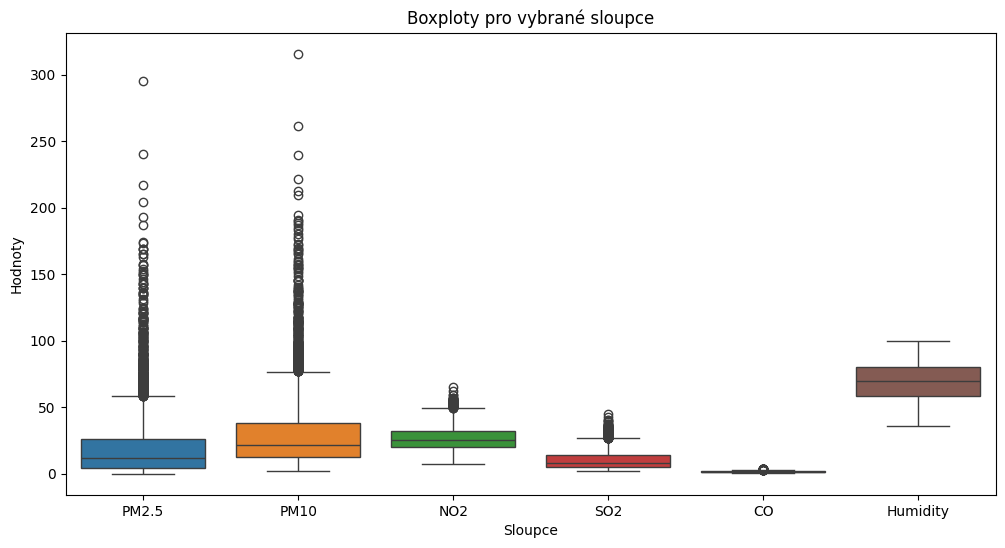

In [189]:
sloupce = ["PM2.5", "PM10", "NO2", "SO2", "CO", "Humidity"]
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[sloupce])
plt.title("Boxploty pro vybrané sloupce")
plt.ylabel("Hodnoty")
plt.xlabel("Sloupce")
plt.show()

In [190]:
pocet_radku_PM2_5_50plus = ((data["PM2.5"] >= 50).sum()/5000)*100
pocet_radku_PM10_50plus = ((data["PM10"] >= 50).sum()/5000)*100
print(f"Podíl outliers PM2.5 ve datasetu : {pocet_radku_PM2_5_50plus}%")
print(f"podíl outliers PM10 v datasetu: {pocet_radku_PM10_50plus}%")


Podíl outliers PM2.5 ve datasetu : 9.56%
podíl outliers PM10 v datasetu: 16.16%


### Vykreslení histogramu - rozložení dat

Vykresluju data do grafu, kvůli vizualizaci rozdělení dat:

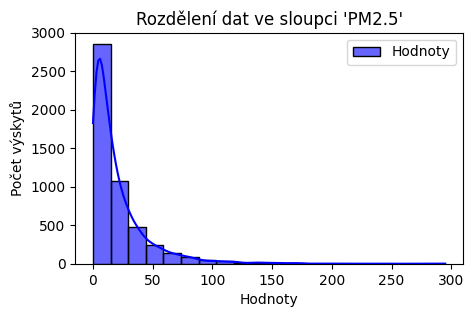

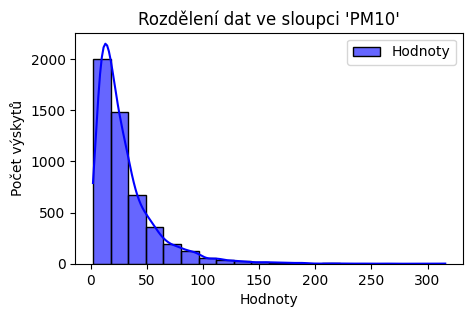

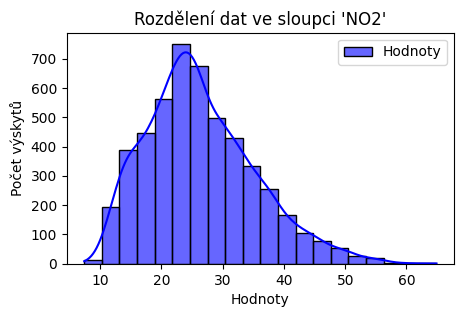

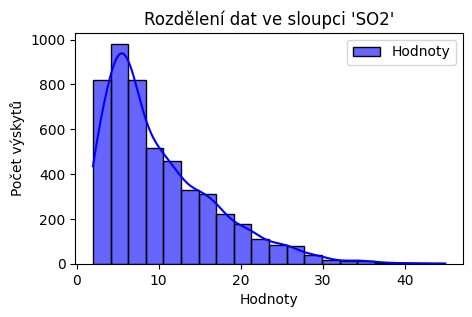

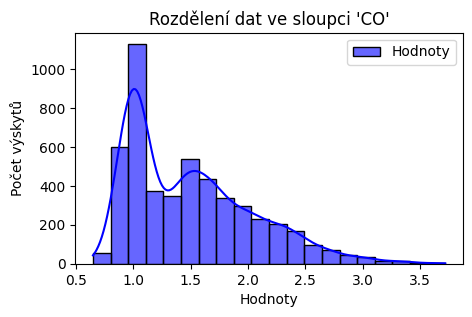

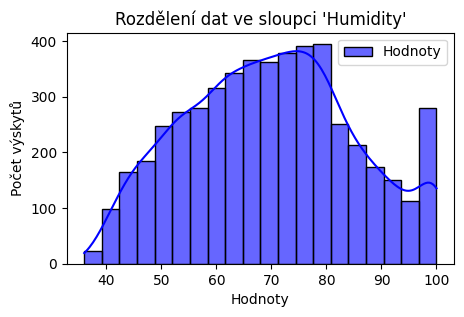

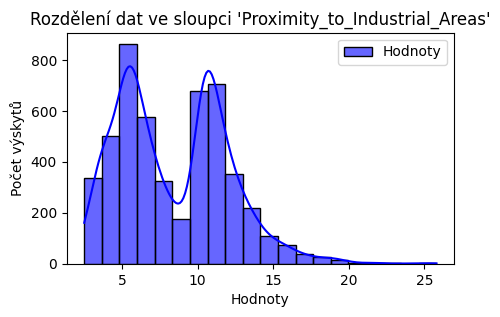

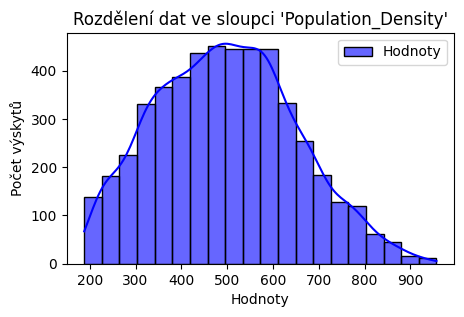

In [191]:
sloupce = ["PM2.5", "PM10", "NO2", "SO2", "CO", "Humidity","Proximity_to_Industrial_Areas", "Population_Density"]
for sloupec in sloupce:
    plt.figure(figsize=(5, 3))
    sns.histplot(data[sloupec], kde=True, bins=20, color="blue", alpha=0.6, label="Hodnoty")
    plt.title(f"Rozdělení dat ve sloupci '{sloupec}'")
    plt.xlabel("Hodnoty")
    plt.ylabel("Počet výskytů")
    plt.legend()
    plt.show()

### Korelace

Korelace nad komplet číselným datasetem:

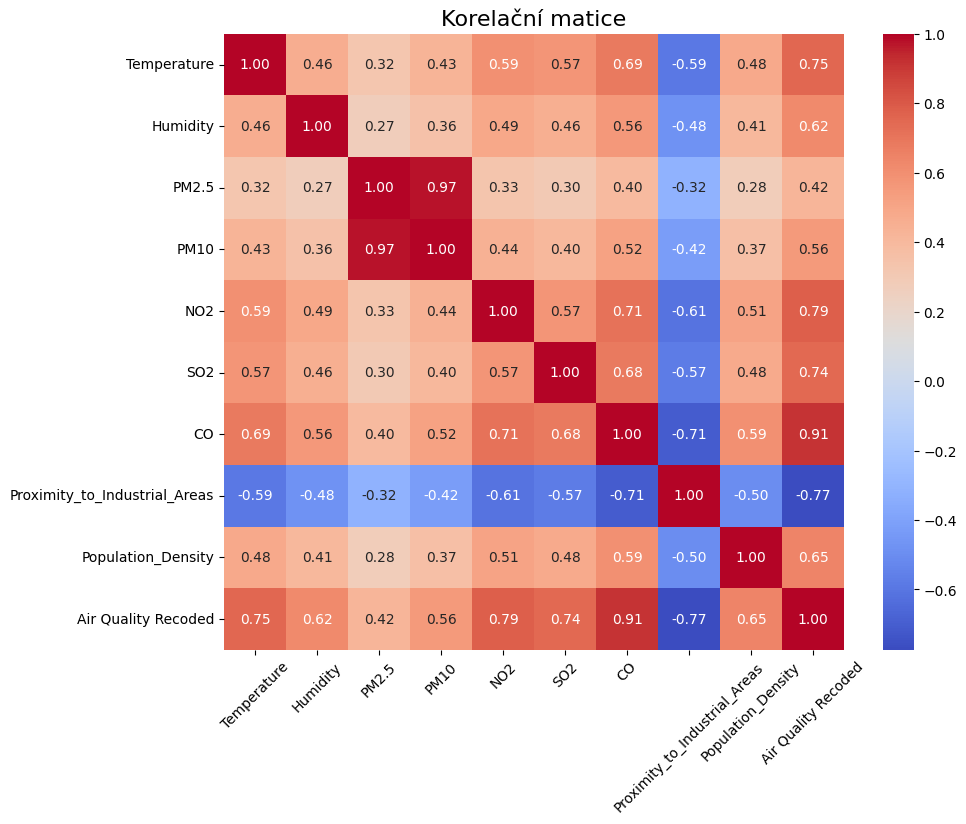

In [192]:
data_recoded = pd.read_csv("recoded_pollution_data.csv")
data_recoded = data_recoded.drop(columns=["Air Quality"])
korelacni_matrice = data_recoded.corr()
korelace_AirQuality = korelacni_matrice["Air Quality Recoded"].sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.heatmap(korelacni_matrice, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Korelační matice", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


### Závěr k datasetu:
1.   Většina nezávisle proměnných má nadpoloviční korelaci, tzn. nemazala bych
2.   Ouliers jsou důležité - zejménna u extrémních stavů, nemazala bych, i když u PM2,5 tvoří 16% dat. Ale můžeme s tím něco ještě udělat.
3.   Nulové hodnoty u vybraných látek - je jich málo, můžeme je doplnit podle vazby mezi těmito látkami navzájem, nebo ve vztahu k AirQuality stupni
4. Překodovala jsem kategorie kvality ovzduší do nového datasetu "recoded".
5. Počet záznamů s vlhostí nad 100% = 1, počet záznamů mínusových hodnot PM2.5 a PM10 je 20 a 30, tzn. tohle bych se nebála smazat.



# Porovnání modelů

### Lazy predict

In [193]:
X = data.drop(columns=['Air Quality'])
y = data['Air Quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lc = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = lc.fit(X_train, X_test, y_train, y_test)
print(models)

 88%|████████▊ | 28/32 [00:05<00:00,  6.42it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000427 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2191
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 9
[LightGBM] [Info] Start training from score -0.921932
[LightGBM] [Info] Start training from score -2.330470
[LightGBM] [Info] Start training from score -1.198985
[LightGBM] [Info] Start training from score -1.592089
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████| 32/32 [00:05<00:00,  5.51it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LGBMClassifier                     0.97               0.95    None      0.97   
RandomForestClassifier             0.96               0.93    None      0.96   
ExtraTreesClassifier               0.95               0.93    None      0.95   
LogisticRegression                 0.95               0.92    None      0.95   
QuadraticDiscriminantAnalysis      0.95               0.92    None      0.95   
BaggingClassifier                  0.94               0.91    None      0.94   
SVC                                0.94               0.91    None      0.94   
LinearDiscriminantAnalysis         0.93               0.90    None      0.93   
DecisionTreeClassifier             0.92               0.89    None      0.92   
KNeighborsClassifier               0.93               0.89    None      0.93   
GaussianNB                         0.92 

- Nejlepší modely pro tento úkol jsou **LGBMClassifier, RandomForestClassifier a ExtraTreesClassifier**. Tyto modely mají nejlepší výsledky v metrikách přesnosti a F1 skóre.
- Pokud hledáš rychlost, **LogisticRegression** je velmi rychlá, ale s o něco nižšími výsledky ve srovnání s ostatními.
- **DummyClassifier** je vhodný pouze pro základní porovnání, protože nemá smysl používat ho pro skutečné predikce.



***Shrnutí výhod těchto modelů:***

LightGBM je velmi rychlý, efektivní a výkonný model pro velká data.
RandomForest je robustní, odolný vůči přeučení a poskytuje stabilní výsledky, i když může být o něco pomalejší než LightGBM.
ExtraTrees je rychlý a přitom dosahuje vysoké přesnosti, podobně jako RandomForest, ale je optimalizován pro rychlost díky vyšší náhodnosti.

***Doporučení pro použití:***

Pokud máš velká data a potřebuješ model s vysokou přesností, LightGBM je často nejlepší volba.
Pokud hledáš robustní model, který dobře funguje s různými datovými sadami a je odolný vůči přeučení, Random Forest je skvělá volba.
Pokud je pro tebe důležitá rychlost a efektivita, ExtraTrees může být tím, co hledáš.

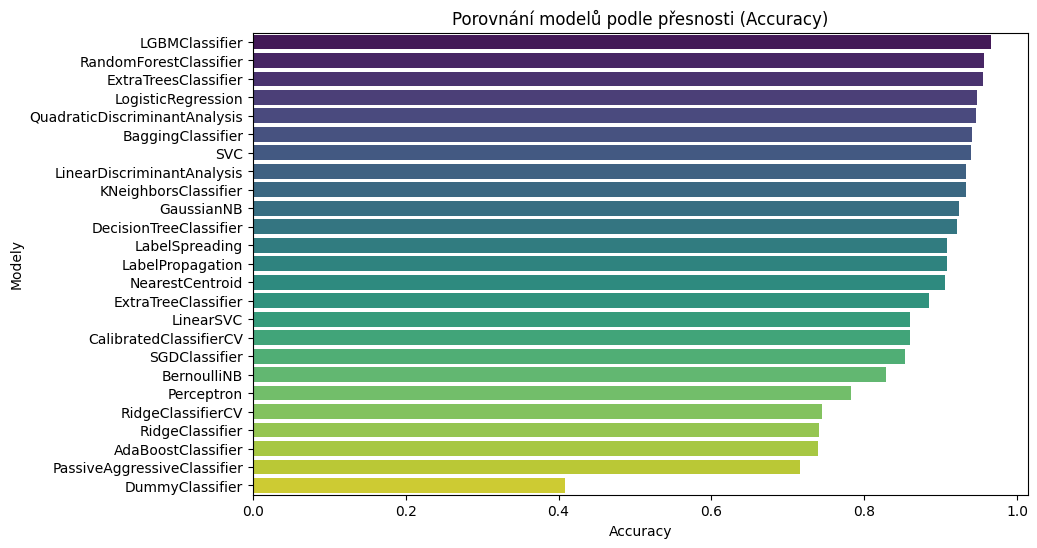

In [194]:
models_sorted = models.sort_values(by="Accuracy", ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=models_sorted["Accuracy"], y=models_sorted.index, palette="viridis")
plt.title("Porovnání modelů podle přesnosti (Accuracy)")
plt.xlabel("Accuracy")
plt.ylabel("Modely")
plt.show()

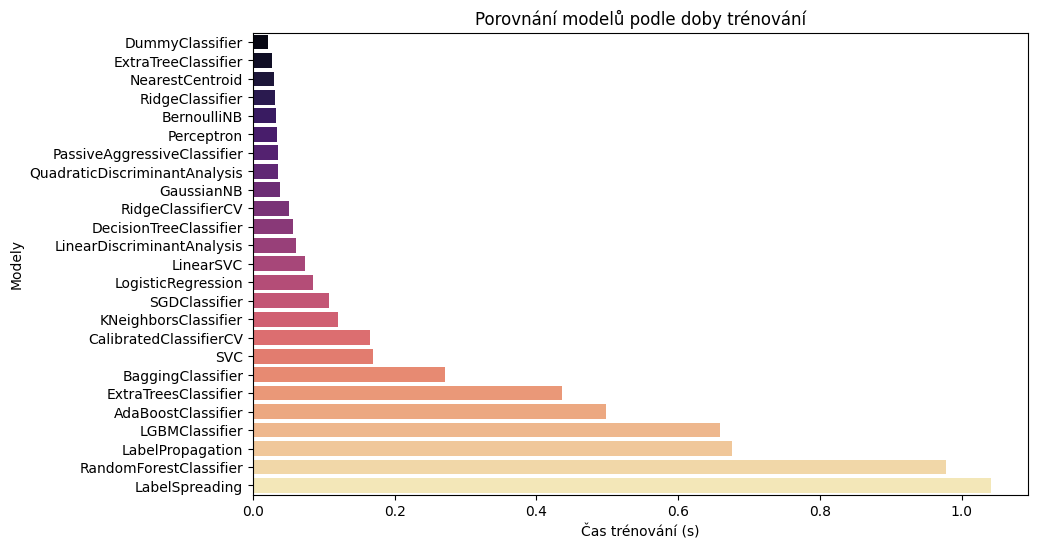

In [195]:
models_sorted_time = models.sort_values(by="Time Taken", ascending=True)
plt.figure(figsize=(10, 6))
sns.barplot(x=models_sorted_time["Time Taken"], y=models_sorted_time.index, palette="magma")
plt.title("Porovnání modelů podle doby trénování")
plt.xlabel("Čas trénování (s)")
plt.ylabel("Modely")
plt.show()

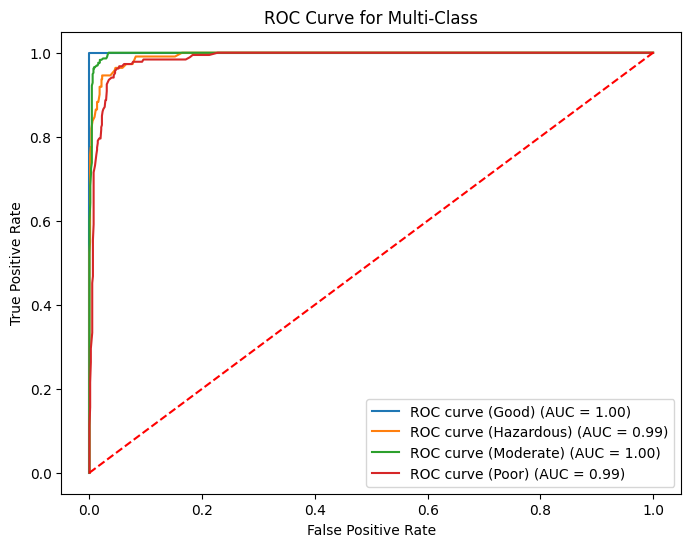

In [196]:
encoder = LabelEncoder()
y_test_encoded = encoder.fit_transform(y_test)
y_test_bin = label_binarize(y_test_encoded, classes=np.unique(y_test_encoded))
y_prob = et_model.predict_proba(X_test)
n_classes = y_test_bin.shape[1]
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure(figsize=(8, 6))
class_names = encoder.classes_
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve ({class_names[i]}) (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class')
plt.legend(loc='lower right')
plt.show()


## LGBMClassifier

In [197]:
X = data.drop(columns=['Air Quality'])
y = data['Air Quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
y_pred = lgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print("Classification Report:")
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000633 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2187
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 9
[LightGBM] [Info] Start training from score -0.921932
[LightGBM] [Info] Start training from score -2.330470
[LightGBM] [Info] Start training from score -1.198985
[LightGBM] [Info] Start training from score -1.592089
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Accuracy: 96.00%
Classification Report:
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       409
   Hazardous       0.93      0.89      0.91       111
    Moderate       0.97      0.97      0.97       294
        Poor       0.89      0.90      0.90       186

    accuracy                           0.96      1000
   macro avg       0.94      0.94      0.94      1000
we

## ExtraTreesClassifier

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
et_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_model.fit(X_train, y_train)
y_pred = et_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 95.50%

Classification Report:
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       409
   Hazardous       0.92      0.85      0.88       111
    Moderate       0.96      0.97      0.97       294
        Poor       0.87      0.90      0.88       186

    accuracy                           0.95      1000
   macro avg       0.94      0.93      0.93      1000
weighted avg       0.96      0.95      0.95      1000



In [199]:
y_true = ['Good', 'Moderate', 'Hazardous', 'Good', 'Poor']
y_pred = ['Good', 'Moderate', 'Hazardous', 'Moderate', 'Poor']
le = LabelEncoder()
y_true_encoded = le.fit_transform(y_true)
y_pred_encoded = le.transform(y_pred)
recall_macro = recall_score(y_true_encoded, y_pred_encoded, average='macro')
recall_weighted = recall_score(y_true_encoded, y_pred_encoded, average='weighted')
print(f"Recall (Macro Average): {recall_macro}")
print(f"Recall (Weighted Average): {recall_weighted}")


Recall (Macro Average): 0.875
Recall (Weighted Average): 0.8


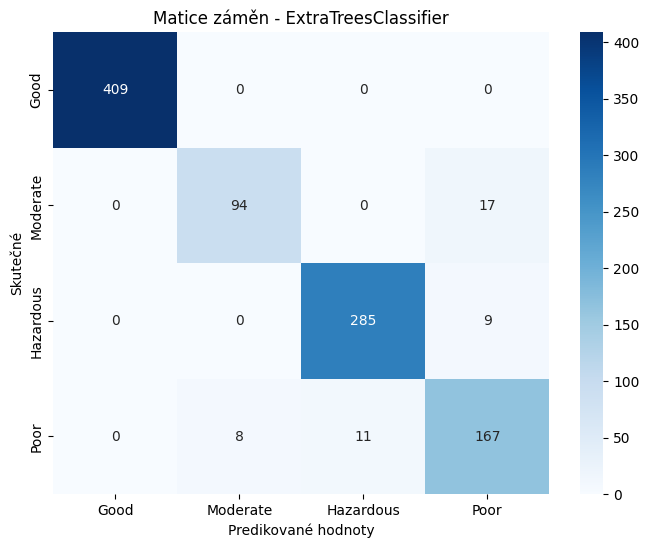

In [200]:
y_pred = et_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Good", "Moderate", "Hazardous", "Poor"], yticklabels=["Good", "Moderate", "Hazardous", "Poor"])
plt.xlabel('Predikované hodnoty')
plt.ylabel('Skutečné')
plt.title('Matice záměn - ExtraTreesClassifier')
plt.show()

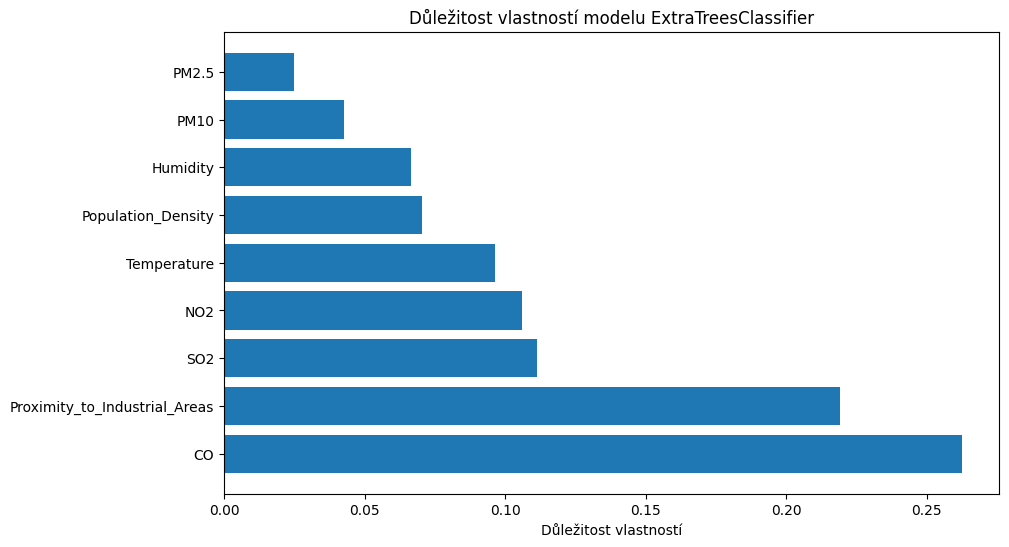

In [201]:
importances = et_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), X_train.columns[indices])
plt.xlabel("Důležitost vlastností")
plt.title("Důležitost vlastností modelu ExtraTreesClassifier")
plt.show()

# Modelování


## KNeighborsClassifier:

In [202]:
X = data.drop(columns=['Air Quality'])
y = data['Air Quality']

In [203]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [205]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [206]:
y_pred = knn_model.predict(X_test)

In [207]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

In [208]:
print(f"Celková přesnost modelu: {accuracy * 100:.2f}%\n")
print("Podrobná zpráva o klasifikaci:")
print(classification_rep)

Celková přesnost modelu: 78.00%

Podrobná zpráva o klasifikaci:
              precision    recall  f1-score   support

        Good       0.91      0.97      0.94       409
   Hazardous       0.70      0.46      0.55       111
    Moderate       0.75      0.78      0.76       294
        Poor       0.55      0.56      0.55       186

    accuracy                           0.78      1000
   macro avg       0.73      0.69      0.70      1000
weighted avg       0.77      0.78      0.77      1000



## Desicion tree

DecisionTreeClassifier:

In [209]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [210]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Přesnost modelu: {accuracy:.2f}")

Přesnost modelu: 0.92


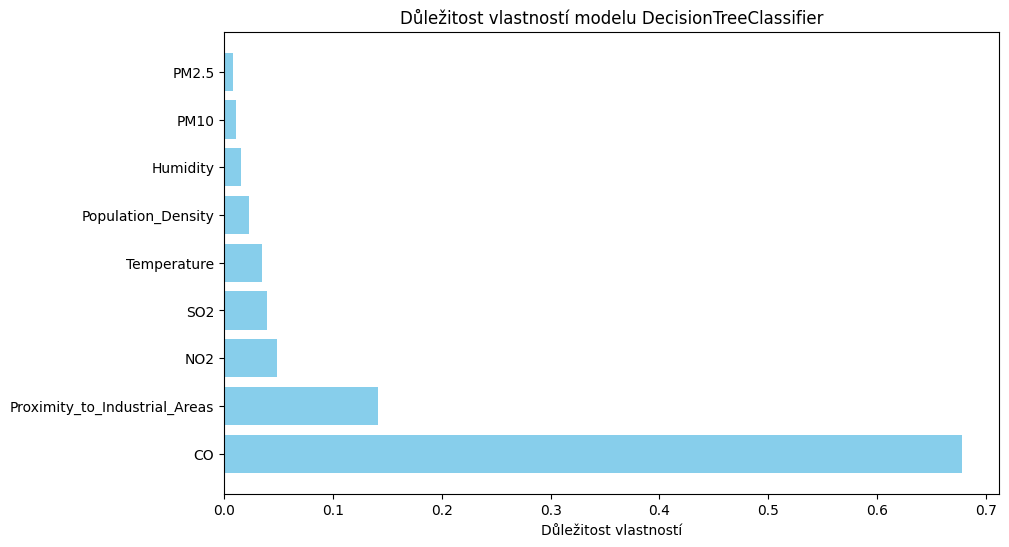

In [211]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances[indices], align="center", color='skyblue')
plt.yticks(range(len(importances)), [X_train.columns[i] for i in indices])
plt.xlabel("Důležitost vlastností")
plt.title("Důležitost vlastností modelu DecisionTreeClassifier")
plt.show()


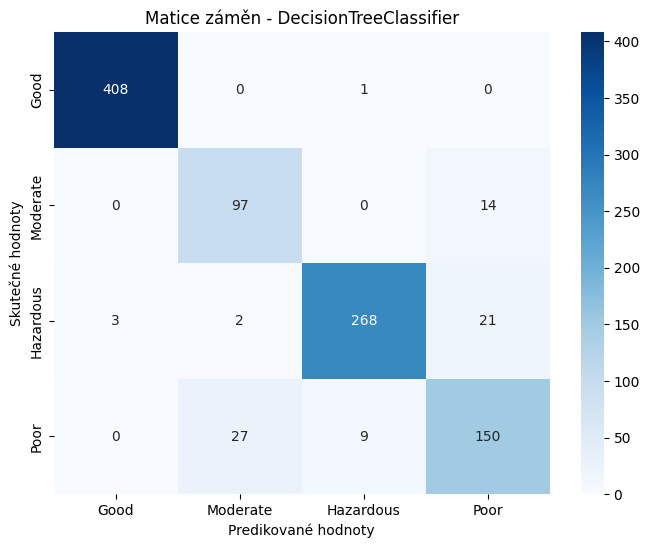

In [212]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Good", "Moderate", "Hazardous", "Poor"],
            yticklabels=["Good", "Moderate", "Hazardous", "Poor"])
plt.xlabel('Predikované hodnoty')
plt.ylabel('Skutečné hodnoty')
plt.title('Matice záměn - DecisionTreeClassifier')
plt.show()